In [157]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

In [158]:
training=pd.read_csv('training_data.csv', sep=',')
test=pd.read_csv('songs_to_classify.csv', sep=',')
training.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
60,0.0242,0.502,226800,0.595,0.00000,5,0.4360,-5.566,1,0.0286,107.642,4,0.449,0
390,0.1820,0.874,216248,0.706,0.00000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
48,0.3740,0.625,194733,0.600,0.02480,1,0.1510,-7.750,1,0.0291,85.959,4,0.180,0
205,0.2030,0.445,173941,0.532,0.00000,10,0.0907,-8.125,1,0.0291,83.462,3,0.196,1
347,0.4660,0.372,259427,0.494,0.00166,11,0.0585,-8.559,1,0.0297,103.660,4,0.227,1


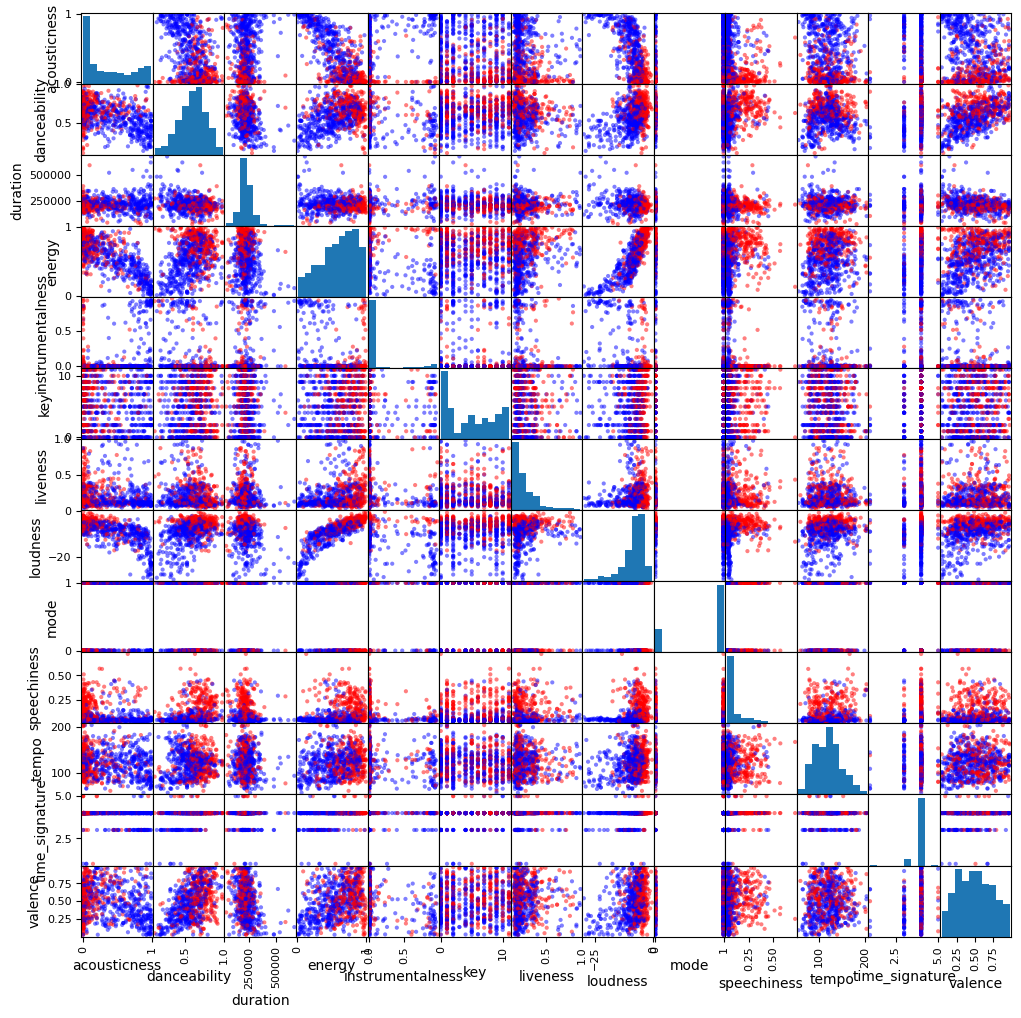

In [159]:
cols = list(map(lambda x: "red" if x == 0 else "blue", training.iloc[:,13]))
feature_selection = range(0, 13) # change here to study other features
pd.plotting.scatter_matrix(training.iloc[:,feature_selection], c=cols, figsize=(12, 12));

(array([298.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 452.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

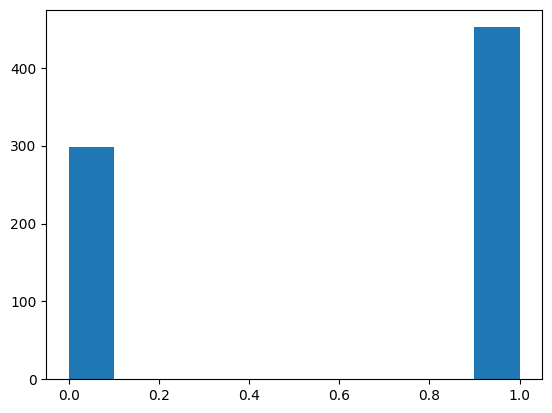

In [160]:
plt.hist(training.loc[:,'label'].values)

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

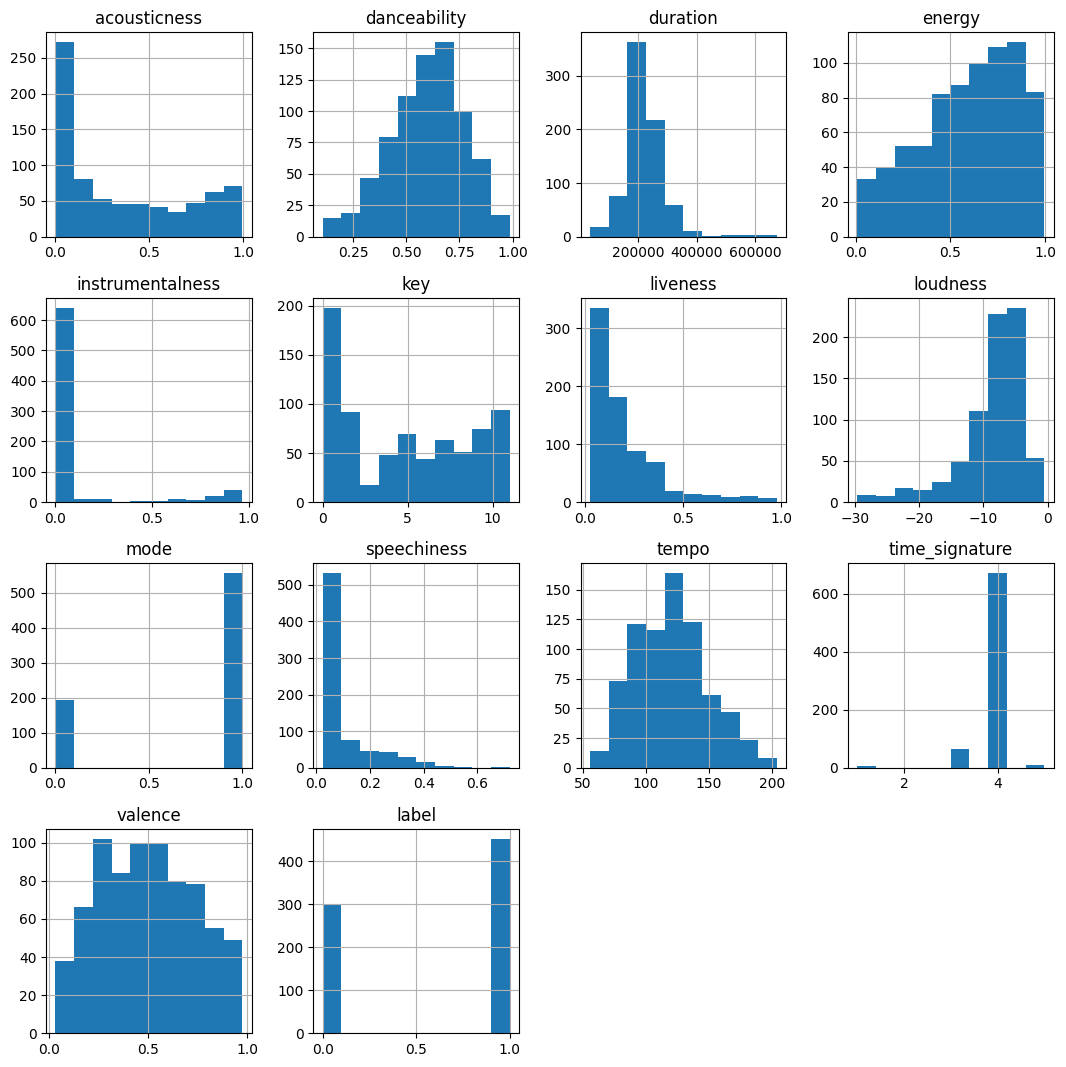

In [161]:
training.hist(figsize=(13,13))

In [162]:
#training.drop(['time_signature','instrumentalness'], axis=1)
# feature_selection = [0,1,2,3,5,6,7,8,9,10,12]
feature_selection = [0,1,3,5,6,7,8,9,10,12]

training.iloc[:,feature_selection]

,acousticness,danceability,energy,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.713000,0.514,0.521,8,0.1120,-14.835,0,0.0444,119.879,0.143
1,0.192000,0.714,0.614,4,0.2630,-6.935,1,0.0319,123.969,0.582
2,0.333000,0.630,0.455,5,0.1270,-9.290,1,0.0292,139.931,0.199
3,0.601000,0.810,0.221,5,0.1840,-11.005,1,0.0429,109.960,0.798
4,0.883000,0.465,0.459,6,0.0692,-8.137,0,0.0351,90.807,0.288
...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,0.943,6,0.1250,-4.108,0,0.0556,112.084,0.338
746,0.001970,0.487,0.867,10,0.0968,-3.293,0,0.0543,160.048,0.403
747,0.916000,0.605,0.314,0,0.3590,-7.631,1,0.0327,138.148,0.836
748,0.168000,0.700,0.823,3,0.1220,-6.892,1,0.0373,144.060,0.745


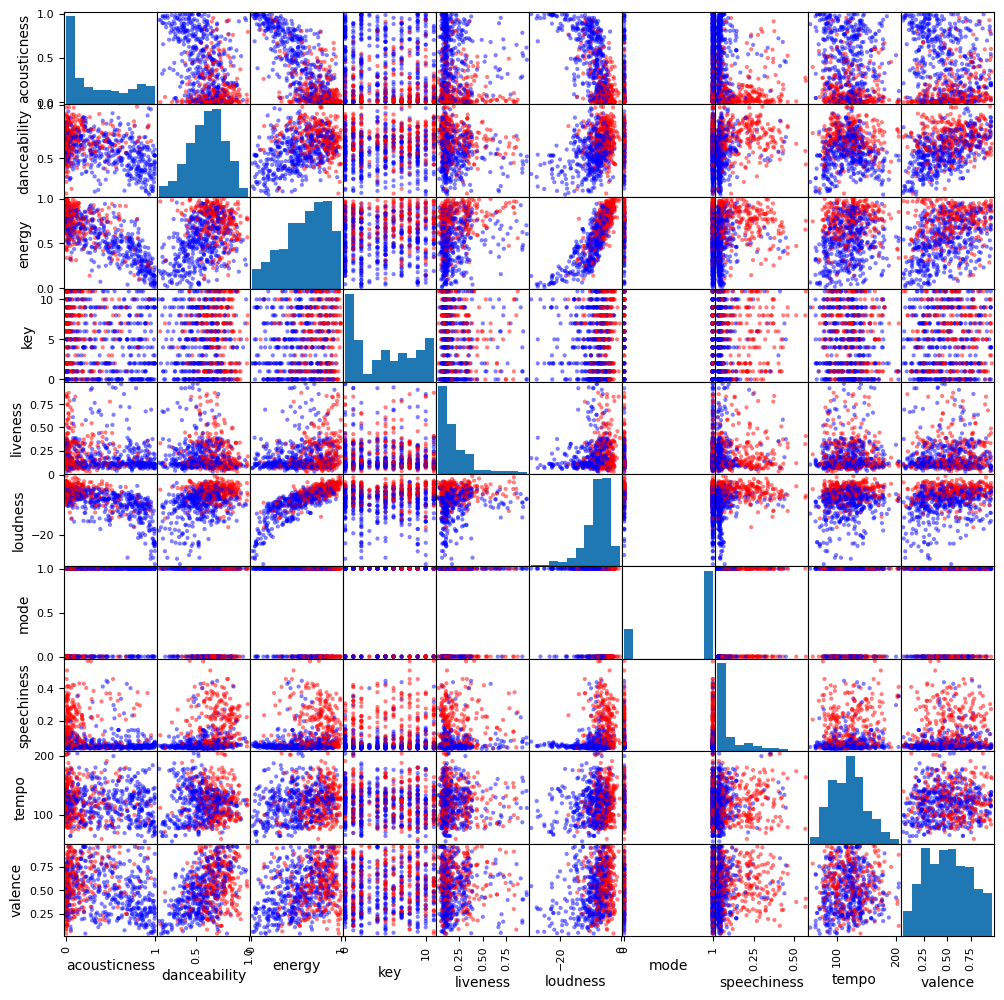

In [163]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.04, random_state=42,  n_jobs=-1)  # Set contamination to desired outlier proportion

# Fit the model and predict outliers (-1 means outlier, 1 means inlier)
outliers = model.fit_predict(training)

# Keep only inliers (rows labeled as 1)
cleaned_data = training[outliers == 1]

cols = list(map(lambda x: "red" if x == 0 else "blue", cleaned_data.iloc[:,13]))
pd.plotting.scatter_matrix(cleaned_data.iloc[:,feature_selection], c=cols, figsize=(12, 12));

In [164]:
# use cleaned data
X, y = training.iloc[:, feature_selection], training.iloc[:, 13]
x_dummy, x_test, y_dummy, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

training = cleaned_data
X, y = training.iloc[:, feature_selection], training.iloc[:, 13]
x_train, x_dummy, y_train, y_dummy = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
#resampling
# smote = SMOTE()
# x_train, y_train = smote.fit_resample(x_train, y_train)

In [166]:
rng = np.random.RandomState(0)
clf = RandomForestClassifier(class_weight='balanced',bootstrap=True, max_samples=0.6, n_estimators=10000, random_state=rng, max_features= 'log2', n_jobs = -1, warm_start = True)
#clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',min_samples_leaf=2,min_samples_split=2,max_samples=0.5, n_estimators=10000, random_state=rng, max_features= 'log2', n_jobs = -1, warm_start = True)
#clf = RandomForestClassifier(bootstrap=True,class_weight='balanced',criterion='entropy',max_depth=40,max_features='log2',max_samples=0.6,min_samples_leaf=2,min_samples_split=2,n_estimators=10000,n_jobs=-1,warm_start = True,random_state=rng)
clf.fit(x_train, y_train)
randomforest = Pipeline([('scaler', StandardScaler()), ('clf', clone(clf))])
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
f1 = f1_score(y_test, y_pred)
print(f1)
# score = randomforest.score(x_test, y_test)
# print("Scaled {} test accuracy: {}".format(randomforest['clf'].__class__.__name__, score))

c:\Users\Jonathan Olsson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\Jonathan Olsson\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to p

0.9714285714285714


In [167]:
# clf = RandomForestClassifier()

# test = np.arange(0.1,1.0,0.2).tolist()

# param_grid = {
#     'n_estimators': [100],                # Number of trees in the forest
#     'max_features': ['auto', 'sqrt', 'log2'],       # Number of features to consider at every split
#     'max_depth': [None, 10, 20, 30, 40, 50],        # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required at each leaf node
#     'bootstrap': [True],                    # Whether bootstrap samples are used when building trees
#     'criterion': ['gini', 'entropy', 'log_loss'],               # Criterion for splitting
#     'class_weight': ['balanced'],
#     'max_features': test,
#     'max_samples': test,
#     'n_jobs': [-1]
#     }

# search = GridSearchCV(clf, param_grid, cv=5, verbose=1, scoring='f1')

# search.fit(x_train, y_train)
# score = search.score(x_test, y_test)
# print("Best CV score: {} using {}".format(search.best_score_, search.best_params_))
# print("Test accuracy: {}".format(score))

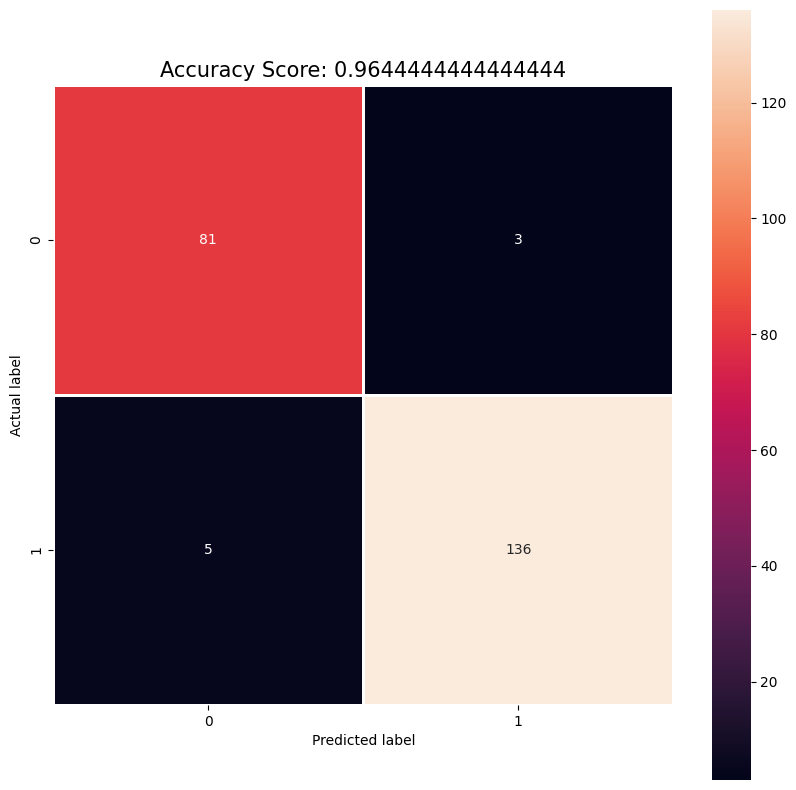

In [168]:
predictions_forest = randomforest.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions_forest)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = randomforest.score(x_test, y_test)
plt.title('Accuracy Score: {0}'.format(score), size = 15);